In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('data/digit-recognizer/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

In [6]:
y_train.shape

(33600, 10)

# L1 regularization

In [10]:
classifier_l1 = Sequential()

In [11]:
regularizer = tf.keras.regularizers.L1(l1=0.01)
classifier_l1.add(Dense(16,activation='relu',kernel_regularizer=regularizer))
classifier_l1.add(Dense(16,activation='relu',kernel_regularizer=regularizer))
classifier_l1.add(Dense(10,activation='sigmoid',kernel_regularizer=regularizer))

In [12]:
classifier_l1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
eps = 100
model_l1 = classifier_l1.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 6.9333 - accuracy: 0.2519 - val_loss: 4.3583 - val_accuracy: 0.4152
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 3.5688 - accuracy: 0.4985 - val_loss: 2.8213 - val_accuracy: 0.6126
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3132 - accuracy: 0.6785 - val_loss: 1.8346 - val_accuracy: 0.7497
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 1.6614 - accuracy: 0.7776 - val_loss: 1.5335 - val_accuracy: 0.8122
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 1.2867 - accuracy: 0.8513 - val_loss: 1.0944 - val_accuracy: 0.8833
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 1.0959 - accuracy: 0.8693 - val_loss: 0.9730 - val_accuracy: 0.8818
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 0.9954 - accuracy: 0.8692 - val_loss: 0.9564 - val_accuracy: 0.8763

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7169 - accuracy: 0.8964 - val_loss: 0.7030 - val_accuracy: 0.9016
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7240 - accuracy: 0.8954 - val_loss: 0.6739 - val_accuracy: 0.9074
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7134 - accuracy: 0.8974 - val_loss: 0.7134 - val_accuracy: 0.8921
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7215 - accuracy: 0.8961 - val_loss: 0.6986 - val_accuracy: 0.9076
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7178 - accuracy: 0.8950 - val_loss: 0.6881 - val_accuracy: 0.9036
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7127 - accuracy: 0.8978 - val_loss: 0.7181 - val_accuracy: 0.8988
Epoch 64/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7149 - accuracy: 0.8958 - val_loss: 0.6999 - val_accuracy:

# L2 regularization

In [15]:
classifier_l2 = Sequential()

In [16]:
regularizer = tf.keras.regularizers.L2(l2=0.01)
classifier_l2.add(Dense(16,activation='relu',kernel_regularizer=regularizer))
classifier_l2.add(Dense(16,activation='relu',kernel_regularizer=regularizer))
classifier_l2.add(Dense(10,activation='sigmoid',kernel_regularizer=regularizer))

In [17]:
classifier_l2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
eps = 100
model_l2 = classifier_l2.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 3.0236 - accuracy: 0.2199 - val_loss: 2.1716 - val_accuracy: 0.3310
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 1.8301 - accuracy: 0.4665 - val_loss: 1.3253 - val_accuracy: 0.6997
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.1523 - accuracy: 0.7334 - val_loss: 0.9962 - val_accuracy: 0.7841
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 0.8792 - accuracy: 0.8057 - val_loss: 0.8156 - val_accuracy: 0.8186
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7132 - accuracy: 0.8352 - val_loss: 0.6558 - val_accuracy: 0.8391
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6033 - accuracy: 0.8584 - val_loss: 0.5460 - val_accuracy: 0.8737
Epoch 7/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.8719 - val_loss: 0.5217 - val_accuracy: 0.8738

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2852 - accuracy: 0.9351 - val_loss: 0.3053 - val_accuracy: 0.9311
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2833 - accuracy: 0.9361 - val_loss: 0.2998 - val_accuracy: 0.9335
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2806 - accuracy: 0.9358 - val_loss: 0.3324 - val_accuracy: 0.9244
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2875 - accuracy: 0.9334 - val_loss: 0.3038 - val_accuracy: 0.9323
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2847 - accuracy: 0.9355 - val_loss: 0.3267 - val_accuracy: 0.9237
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2850 - accuracy: 0.9352 - val_loss: 0.3018 - val_accuracy: 0.9335
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.9355 - val_loss: 0.2886 - val_accuracy:

# L1_L2 regularization

In [19]:
classifier_l1l2 = Sequential()

In [20]:
regularizer = tf.keras.regularizers.L1L2(l1=0.01,l2=0.01)
classifier_l1l2.add(Dense(16,activation='relu',kernel_regularizer=regularizer))
classifier_l1l2.add(Dense(16,activation='relu',kernel_regularizer=regularizer))
classifier_l1l2.add(Dense(10,activation='sigmoid',kernel_regularizer=regularizer))

In [21]:
classifier_l1l2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
eps = 100
model_l1l2 = classifier_l1l2.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 6.8587 - accuracy: 0.1862 - val_loss: 4.5701 - val_accuracy: 0.3371
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 3.3640 - accuracy: 0.5097 - val_loss: 2.3660 - val_accuracy: 0.6951
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.8935 - accuracy: 0.7549 - val_loss: 1.4627 - val_accuracy: 0.8045
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 1.2378 - accuracy: 0.8382 - val_loss: 1.0457 - val_accuracy: 0.8546
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 0.9838 - accuracy: 0.8599 - val_loss: 0.9303 - val_accuracy: 0.8562
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 0.9006 - accuracy: 0.8664 - val_loss: 0.8991 - val_accuracy: 0.8521
Epoch 7/100
840/840 [==============================] - 2s 2ms/step - loss: 0.8409 - accuracy: 0.8731 - val_loss: 0.8289 - val_accuracy: 0.8668

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7370 - accuracy: 0.8953 - val_loss: 0.7121 - val_accuracy: 0.9061
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7401 - accuracy: 0.8942 - val_loss: 0.7489 - val_accuracy: 0.8970
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7382 - accuracy: 0.8957 - val_loss: 0.7130 - val_accuracy: 0.9052
Epoch 61/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7369 - accuracy: 0.8947 - val_loss: 0.7396 - val_accuracy: 0.8990
Epoch 62/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7365 - accuracy: 0.8956 - val_loss: 0.7038 - val_accuracy: 0.9068
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7342 - accuracy: 0.8965 - val_loss: 0.7576 - val_accuracy: 0.8874
Epoch 64/100
840/840 [==============================] - 2s 2ms/step - loss: 0.7421 - accuracy: 0.8927 - val_loss: 0.7454 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

Text(0, 0.5, 'Accuracy')

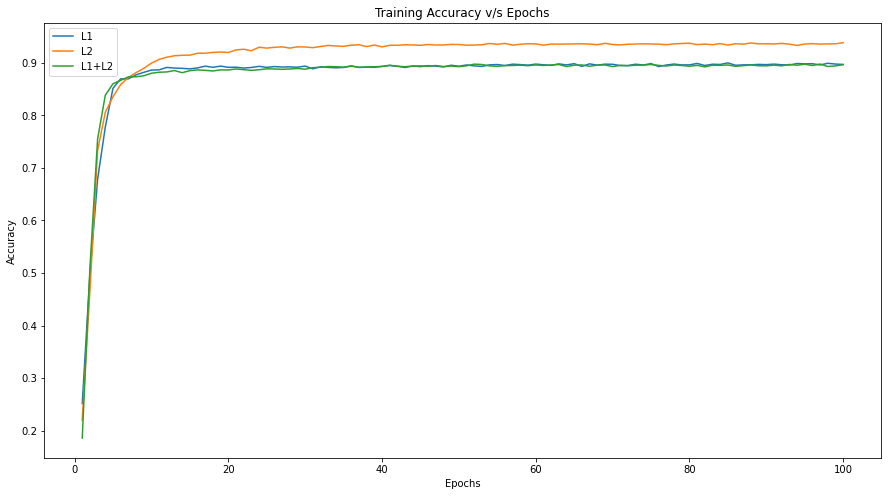

In [23]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_accuracy1 = model_l1.history['accuracy']
train_accuracy2 = model_l2.history['accuracy']
train_accuracy3 = model_l1l2.history['accuracy']
sns.lineplot(epochs, train_accuracy1, label ='L1',linewidth=1.5)
sns.lineplot(epochs, train_accuracy2, label ='L2',linewidth=1.5)
sns.lineplot(epochs, train_accuracy3, label ='L1+L2',linewidth=1.5)
plt.title('Training Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')